In [1]:
from body_matrix import load
from body_matrix import infer
from body_matrix import measure 

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Body_Matrixes/samples/sample01.mp4", 
    -90, 
    10
)

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
box, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

box

Found  6  person in the frame
Distances:  [423.6071472167969, 326.2012252807617, 19.03369140625, 127.439697265625, 68.22633361816406, 63.51310729980469]
Areas:  [137201.93294489756, 147093.1753197452, 244059.27120015025, 13352.044554054737, 84258.8374577649, 34302.10220799409]
FOCUSES:  [323.88956099147055, 450.9277216636509, 12822.48755593514, 104.77147106073875, 1234.9899663277884, 540.0791059721869]
Select keypoint index 2


[432.56414794921875, 660.84375, 693.5032348632812, 1596.155029296875]

In [2]:
box_center = measure.box_center_coordinate(box)
box_center

[563.03369140625, 1128.4993896484375]

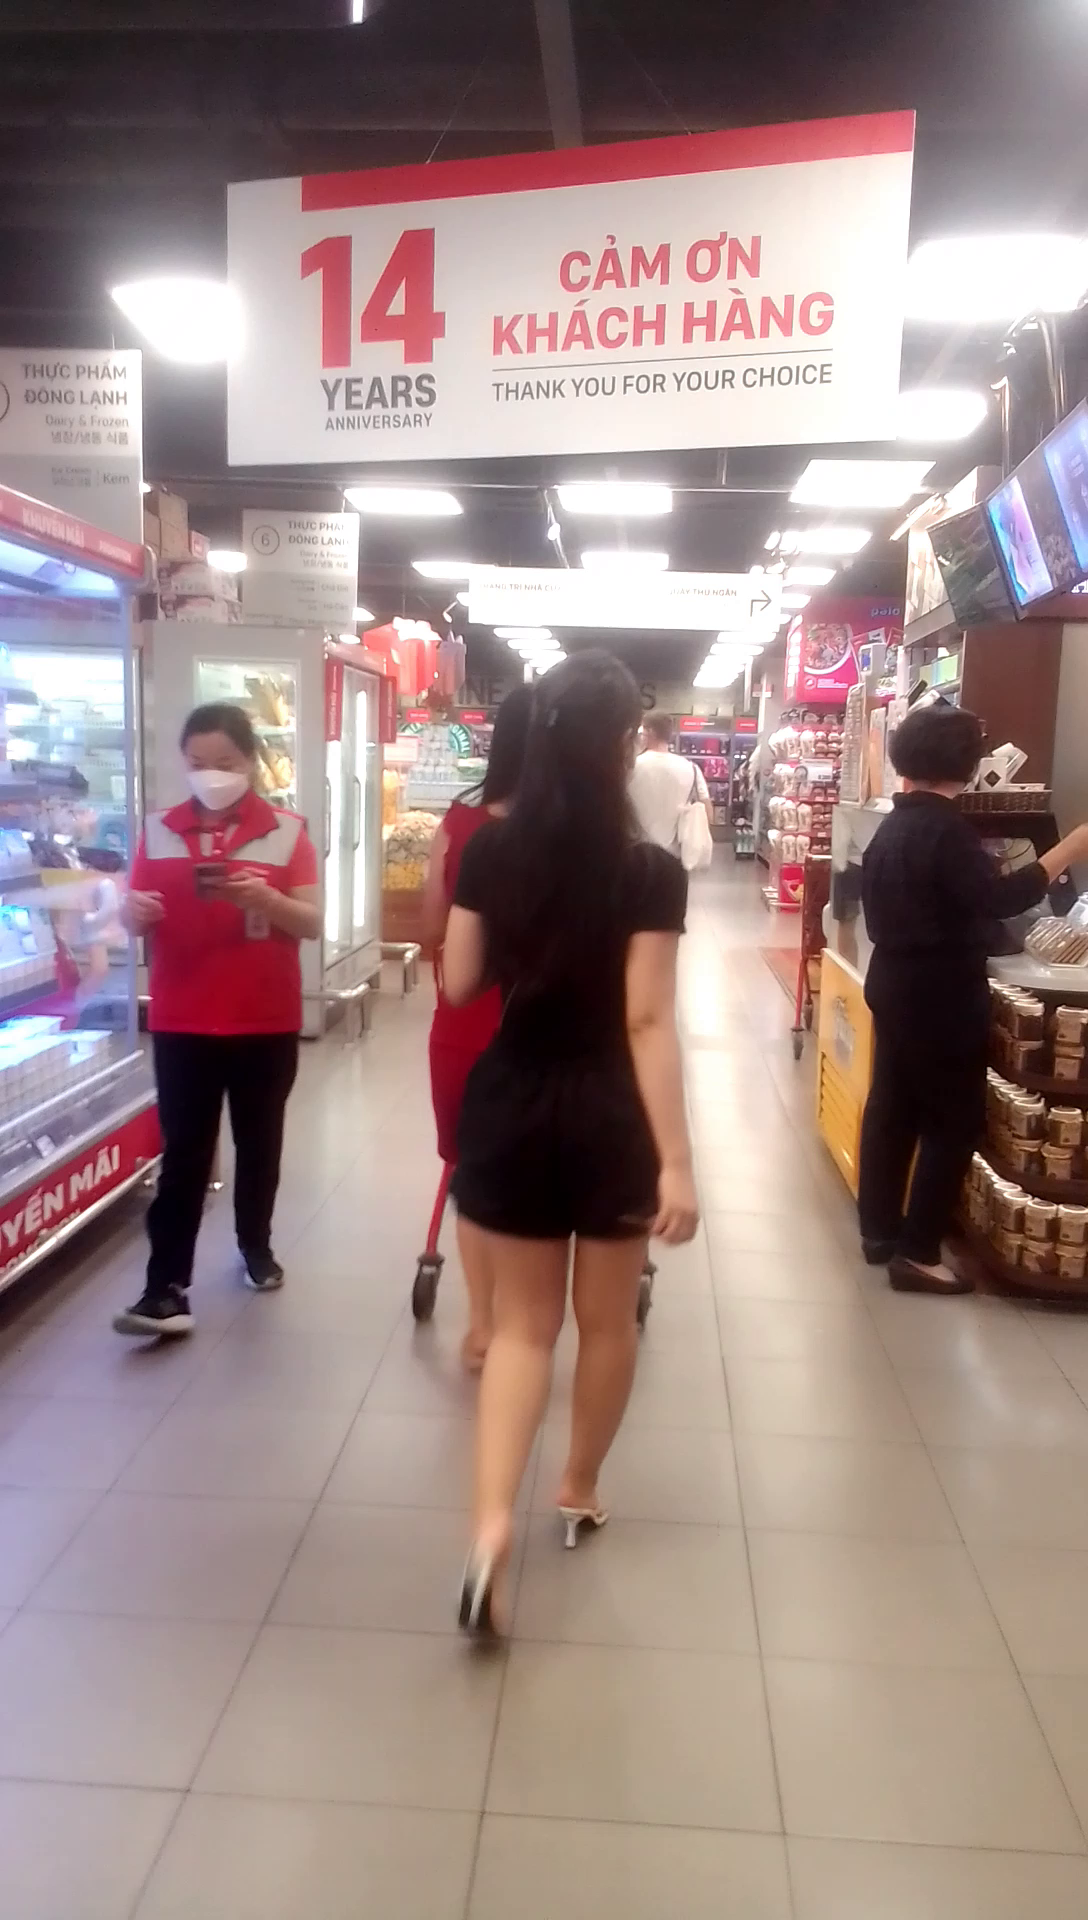

In [3]:
sample_frame

In [4]:
boxes = infer.detect_targets(
    frame=sample_frame, 
    device="cpu",
    min_accuracy=0.8,
    kp_model=keypoints_model, 
    kp_transforms=keypoints_transform 
)

In [5]:
boxes

tensor([[ 849.7753,  710.3184, 1085.4390, 1292.5123],
        [ 104.1896,  695.3242,  331.4080, 1342.6890],
        [ 432.5641,  660.8438,  693.5032, 1596.1550],
        [ 631.5929,  711.6570,  711.2865,  879.1993],
        [ 411.8116,  700.8230,  539.7357, 1359.4857],
        [ 420.8542,  685.0902,  540.1196,  972.7018]],
       grad_fn=<SqueezeBackward1>)

In [6]:
person_a = boxes[0]
person_b = boxes[1]

distance = measure.two_boxes_distance(person_a, person_b)
distance

tensor([ 849.7753,  710.3184, 1085.4390, 1292.5123], grad_fn=<SelectBackward0>)
tensor([ 104.1896,  695.3242,  331.4080, 1342.6890], grad_fn=<SelectBackward0>)


750.0147081891128

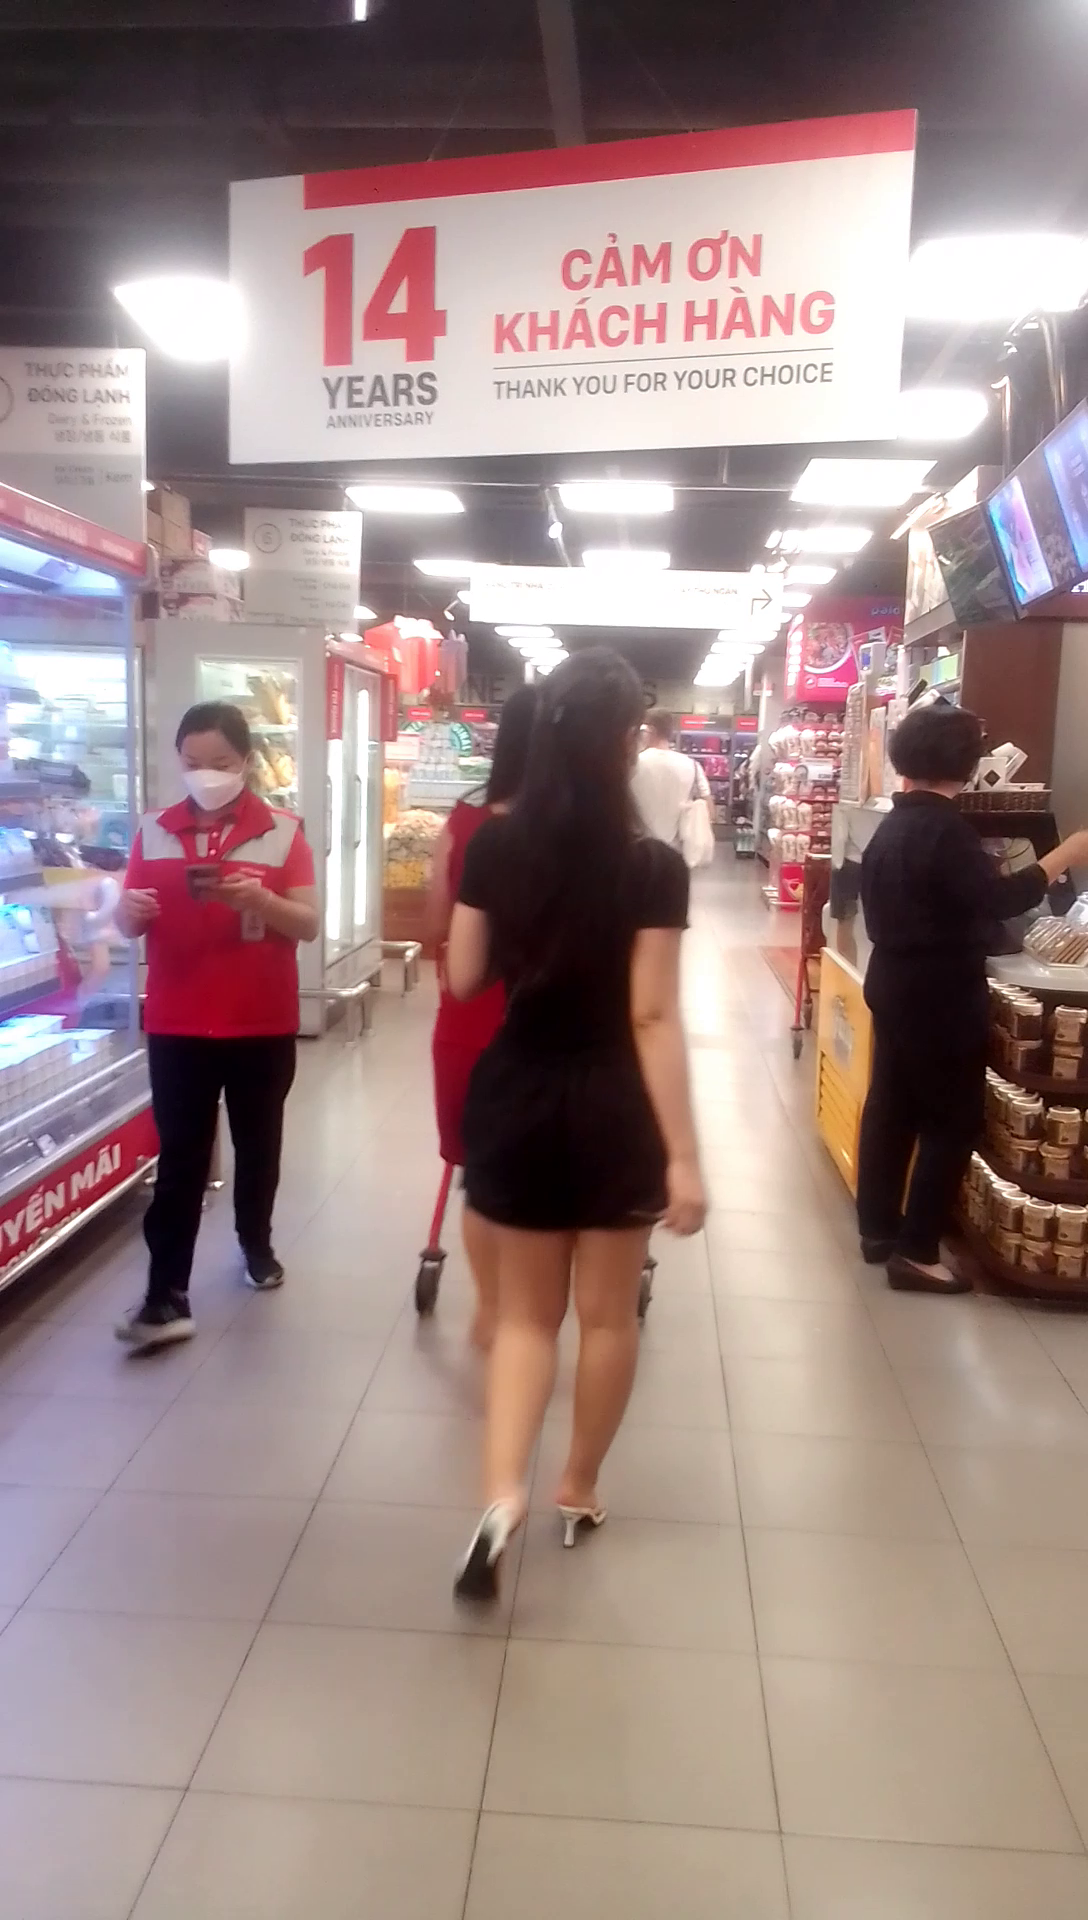

In [7]:
from torchvision.transforms.functional import to_pil_image
next_frame = to_pil_image(video[11])
next_frame  = next_frame.rotate(-90, expand=True)
next_frame

In [8]:
next_box, keypoints = infer.detect_main_target(
    frame=next_frame, 
    device="cpu",
    min_accuracy=0.8,
    kp_model=keypoints_model, 
    kp_transforms=keypoints_transform 
)

Found  5  person in the frame
Distances:  [421.8880310058594, 331.4436149597168, 21.326995849609375, 129.9559326171875, 61.942962646484375]
Areas:  [144422.88675733656, 149908.40079457266, 247064.32447391003, 13439.22203451395, 93515.03520731255]
FOCUSES:  [342.3251577272898, 452.28930058825335, 11584.581636163035, 103.41368619239572, 1509.695875236282]
Select keypoint index 2


In [9]:
moved_distance = measure.two_boxes_distance(box, next_box)
moved_distance

[432.56414794921875, 660.84375, 693.5032348632812, 1596.155029296875]
[432.2122802734375, 660.2041015625, 698.4417114257812, 1588.2169189453125]


4.863510227270689

In [10]:
distance = measure.distance_from_vertical_line(
    pic=sample_frame, 
    bbox=box
)

distance

(19.03369140625, 244059.27120015025)

In [11]:
distance_03 = measure.box_distance_from_center(sample_frame, box)
distance_03

(169.57100495203866, 244059.27120015025)

In [12]:
keypoints[0]

tensor([637.2809, 747.2502,   1.0000], grad_fn=<SelectBackward0>)

In [13]:
measure.two_points_distance(keypoints[0], keypoints[1])

17.265320097703718

In [14]:
x, y = measure.find_middle_point(keypoints[0], keypoints[1])

In [15]:
print(x.item(), y.item())

637.2808837890625 738.6175537109375


In [16]:
distance = measure.distance_from_horizon_line(
    sample_frame, 
    box
)

In [17]:
distance

(168.4993896484375, 244059.27120015025)